In [30]:
import pandas as pd
from konlpy.tag import Okt
import collections
rank = pd.read_csv('comment_rank.csv')
rank.head()
rank.info()
okt = Okt()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  990 non-null    int64 
 1   movie       990 non-null    object
 2   comment     891 non-null    object
 3   rank        990 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.1+ KB


In [31]:
rank.isnull().sum()
rank.head()

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
2,2,롱 리브 더 킹: 목포 영웅,NaN,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10


In [32]:
rank.dropna(inplace=True)
#rank.drop_duplicates(subset='comment',inplace=True)
rank['comment'] = rank['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
rank.info()



<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 989
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  891 non-null    int64 
 1   movie       891 non-null    object
 2   comment     891 non-null    object
 3   rank        891 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 34.8+ KB


In [44]:
temp_list = []
for sentence in rank['comment'][rank['movie'] == '싱크홀']:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if tag in ['Noun','Adjective']:
            temp_list.append(word)
counts = collections.Counter(temp_list)
tag = counts.most_common(10)



In [51]:
tag


['싱크홀',
 '별로',
 '말',
 '많던데',
 '제',
 '좋아하는',
 '장르',
 '배우',
 '좋아하는',
 '분',
 '꼭',
 '보고',
 '이제',
 '진심',
 '웃기',
 '재밌는데요',
 '쫄깃',
 '슬프고',
 '감동',
 '부분',
 '있고',
 '좋아요',
 '광수',
 '진짜',
 '그냥',
 '런닝맨',
 '거',
 '같음',
 '또',
 '좋아하는',
 '이학주',
 '남다름',
 '김성균',
 '좋게',
 '저',
 '싱크홀',
 '별로',
 '말',
 '많던데',
 '제',
 '좋아하는',
 '장르',
 '배우',
 '좋아하는',
 '분',
 '꼭',
 '보고',
 '이제',
 '진심',
 '웃기',
 '재밌는데요',
 '쫄깃',
 '슬프고',
 '감동',
 '부분',
 '있고',
 '좋아요',
 '광수',
 '진짜',
 '그냥',
 '런닝맨',
 '거',
 '같음',
 '또',
 '좋아하는',
 '이학주',
 '남다름',
 '김성균',
 '좋게',
 '저',
 '싱크홀',
 '별로',
 '말',
 '많던데',
 '제',
 '좋아하는',
 '장르',
 '배우',
 '좋아하는',
 '분',
 '꼭',
 '보고',
 '이제',
 '진심',
 '웃기',
 '재밌는데요',
 '쫄깃',
 '슬프고',
 '감동',
 '부분',
 '있고',
 '좋아요',
 '광수',
 '진짜',
 '그냥',
 '런닝맨',
 '거',
 '같음',
 '또',
 '좋아하는',
 '이학주',
 '남다름',
 '김성균',
 '좋게',
 '저',
 '싱크홀',
 '별로',
 '말',
 '많던데',
 '제',
 '좋아하는',
 '장르',
 '배우',
 '좋아하는',
 '분',
 '꼭',
 '보고',
 '이제',
 '진심',
 '웃기',
 '재밌는데요',
 '쫄깃',
 '슬프고',
 '감동',
 '부분',
 '있고',
 '좋아요',
 '광수',
 '진짜',
 '그냥',
 '런닝맨',
 '거',
 '같음',
 '또',
 '좋아하는',
 '이학주',
 '남다름',
 

In [46]:
from wordcloud import WordCloud
#wc=WordCloud(font_path=font_path,background_color='skyblue', max_font_size=60)
wc=WordCloud(font_path='malgun',background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))
cloud

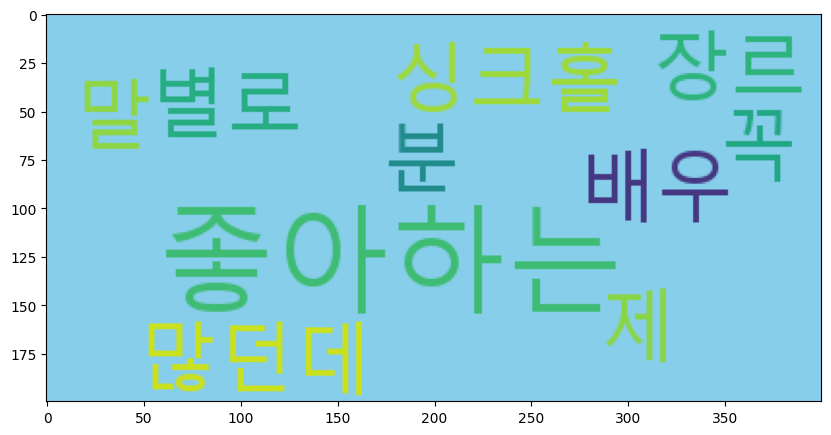

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)

In [83]:
df = pd.read_table('article.txt')
df['article'] = df['article'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#df[df.article.str.contains('[a-zA-Z0-9+-\_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')]


,article
10,정경훈 기자 straight@mt.co.kr
22,박다영 기자 allzero@mt.co.kr
28,"☞공감언론 뉴시스 cjk9714@newsis.com, leo@newsis.com"
36,김도형 기자 namu@hankookilbo.com김정현 기자 virtu@hankoo...
43,chan@yna.co.kr
77,☞공감언론 뉴시스 goodchang@newsis.com
96,☞공감언론 뉴시스 ddobagi@newsis.com
134,[이재호 기자(jh1128@pressian.com)]호세프 보렐 유럽연합(EU) 외...
153,인천=김민 기자 ki84@kmib.co.kr
161,대구=최일영 기자 mc102@kmib.co.kr


In [84]:
from konlpy.tag import Okt
import collections
okt = Okt()

temp_list=[]

for sentence in df['article']:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if tag in ['Noun','Adjective']:
            temp_list.append(word)
counts = collections.Counter(temp_list)
tag = counts.most_common(30)
tag

[('것', 60),
 ('등', 53),
 ('대표', 52),
 ('이', 50),
 ('전', 46),
 ('고', 41),
 ('수', 36),
 ('있다', 32),
 ('며', 23),
 ('대한', 22),
 ('대해', 20),
 ('정치', 19),
 ('대통령', 19),
 ('시험', 19),
 ('그', 18),
 ('경우', 18),
 ('기자', 17),
 ('명', 17),
 ('지난', 16),
 ('빈대', 16),
 ('있는', 15),
 ('라며', 15),
 ('계약', 15),
 ('해상', 15),
 ('말', 15),
 ('국민', 15),
 ('감소', 15),
 ('이스라엘', 15),
 ('제', 14),
 ('위원장', 14)]

In [85]:
from wordcloud import WordCloud
#wc=WordCloud(font_path=font_path,background_color='skyblue', max_font_size=60)
wc=WordCloud(font_path='malgun',background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))
cloud

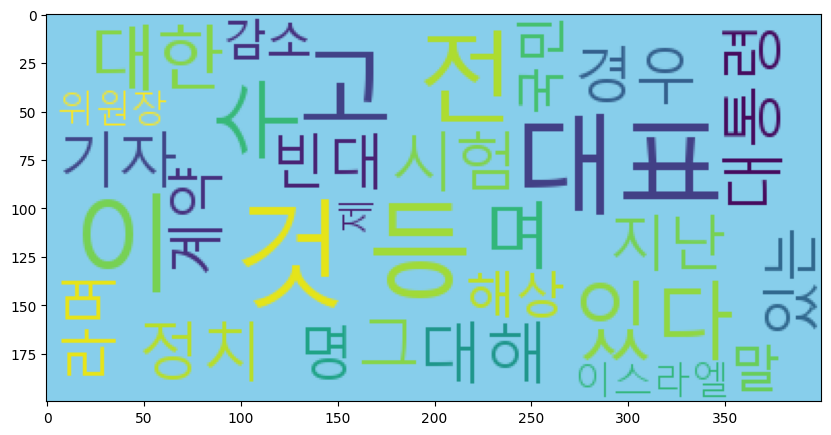

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.imshow(cloud)